In [ ]:
#pip install hypernetx

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
import hypernetx as hnx
import numpy as np
import warnings 
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv("final_dataset_ridotto.csv", sep=',')

df.head()

,gene,disease
0,A1CF,colorectal adenoma
1,A1CF,benign neoplasm
2,A1CF,adenoma
3,A1CF,gastrointestinal system benign neoplasm
4,A3GALT2,developmental disorder of mental health


In [3]:
df.describe()

,gene,disease
count,52769,52769
unique,9334,250
top,HLA-DQA1,cancer
freq,81,3168


In [ ]:
H = hnx.Hypergraph(df) #this one for analysis on the original hypergraph
H_collapsed = H.collapse_nodes_and_edges() #this one for analysis on the collapsed hypergraph
H=H_collapsed

In [6]:
hnx.info_dict(H)

{'nrows': 250,
 'ncols': 2203,
 'aspect ratio': 0.11348161597821153,
 'ncells': 20592,
 'density': 0.03738901497957331}

In [7]:
H.degree('acne', s=1)

71

In [28]:
num_nodes = len(H.nodes)
num_edges = len(H.edges)
print(f"Number of nodes: {num_nodes}")
print(f"Number of hyperedges: {num_edges}")

node_degrees = [H.degree(node) for node in H.nodes]
print(f"Node degree: min={np.min(node_degrees)}, max={np.max(node_degrees)}, avg={np.mean(node_degrees):.2f}")

edge_sizes = [len(H.edges[e]) for e in H.edges]
print(f"Hyperedge size: min={np.min(edge_sizes)}, max={np.max(edge_sizes)}, avg={np.mean(edge_sizes):.2f}")

Number of nodes: 250
Number of hyperedges: 2203
Node degree: min=1, max=1086, avg=82.37
Hyperedge size: min=1, max=81, avg=9.35


In [8]:
H.incidence_dict

{'A1CF': ['adenoma',
  'benign neoplasm',
  'colorectal adenoma',
  'gastrointestinal system benign neoplasm'],
 'A3GALT2': ['attention deficit hyperactivity disorder',
  'colitis',
  'developmental disorder of mental health',
  'specific developmental disorder'],
 'AAAS': ['hypospadias', 'physical disorder'],
 'AACS': ['attention deficit hyperactivity disorder',
  'developmental disorder of mental health',
  'specific developmental disorder'],
 'AADACL4': ['glaucoma', 'open-angle glaucoma'],
 'AAGAB': ['Respiratory Allergy',
  'Thyroid gland carcinoma',
  'adenoma',
  'arthritis',
  'asthma',
  'benign neoplasm',
  'cancer',
  'carcinoma',
  'cell type cancer',
  'colitis',
  'colorectal adenoma',
  'endocrine gland cancer',
  'endometriosis',
  'gastrointestinal system benign neoplasm',
  'organ system cancer',
  'osteoarthritis',
  'sleep disorder'],
 'AAK1': ['atrial fibrillation', 'dental caries'],
 'AAMDC': ['cancer',
  'carcinoma',
  'cell type cancer',
  'male reproductive orga

In [9]:
print('1-component edge sets:')
for comp in H.s_components(s=1):
    print(comp)

1-component edge sets:
{'LTBP1', 'MED22', 'FGF19', 'FAM133B', 'EBF2', 'FAP', 'FBLIM1', 'JAKMIP3', 'DMRT1', 'SSMEM1', 'PRPF3', 'HLA-DPB1', 'CALHM1', 'PSMD3', 'ANGPTL8', 'JAKMIP2', 'ABHD14A', 'LSM8', 'ANTXR1', 'NR5A2', 'DCDC2C', 'MCHR1', 'ATP9A', 'COL10A1', 'CDAN1', 'HLA-DRA', 'HOXB7', 'AATK', 'OR2W1', 'PGAM5', 'NTN1', 'EEPD1', 'CEP68', 'CDCA7', 'CDHR5', 'TRIM10', 'A3GALT2', 'SLMAP', 'OSMR', 'CD44', 'NSD3', 'ARL6IP4', 'FRMD4A', 'PDE1C', 'MSX1', 'NDUFA4L2', 'IL6', 'ACAP3', 'PDCD5', 'ABCC1', 'C1QTNF9B', 'IQCN', 'JAZF1', 'AR', 'BMF', 'TCF4', 'ACSM5', 'SUFU', 'EIF4B', 'LRSAM1', 'ZSCAN23', 'CNOT3', 'RAD51B', 'ARAP1', 'MBIP', 'POT1', 'CARD9', 'KPNA4', 'MRTFA', 'POU2AF1', 'ACAP1', 'FADS1', 'GIPR', 'CUTA', 'GNPDA1', 'PDLIM4', 'CELF2', 'CADPS2', 'GSX2', 'HNF4G', 'RAB20', 'SEC24C', 'KLF7', 'IRF1', 'ARHGEF18', 'SLK', 'ABCC10', 'ILDR1', 'DPP6', 'EBF1', 'CDC42BPB', 'CCR4', 'ARFGEF2', 'GALK2', 'IP6K3', 'GDF15', 'ZFP1', 'SDK1', 'ASCL2', 'DGLUCY', 'LRP1', 'LRRC25', 'CTRL', 'ACE', 'ADRM1', 'MAFF', 'FGF10

In [18]:
node_to_edges = {}
for edge, nodes in H.incidence_dict.items():
    for node in nodes:
        node_to_edges.setdefault(node, []).append(edge)

node_degrees = {node: len(edges) for node, edges in node_to_edges.items()}
sorted_nodes = sorted(node_degrees.items(), key=lambda x: x[1], reverse=True)
top20_nodes = sorted_nodes[:20]

df_top20_nodes = pd.DataFrame(top20_nodes, columns=["Node", "Number of Hyperedges"])
print(df_top20_nodes)

                                        Node  Number of Hyperedges
0                                     cancer                  1086
1                        organ system cancer                  1079
2                           cell type cancer                   798
3                                  carcinoma                   758
4    developmental disorder of mental health                   572
5                  reproductive organ cancer                   492
6                             sleep disorder                   490
7                                  arthritis                   445
8            specific developmental disorder                   415
9                         cognitive disorder                   415
10            male reproductive organ cancer                   399
11  attention deficit hyperactivity disorder                   387
12                             mood disorder                   374
13                           prostate cancer                  

In [10]:
print('\n30-component sub-hypergraph incidence dictionaries:')
for comp in H.s_component_subgraphs(s=30):
    print(comp.incidence_dict)
    


30-component sub-hypergraph incidence dictionaries:
{'ABHD16A': ['Lung non-small cell carcinoma', 'Stevens-Johnson syndrome', "Takayasu's arteritis", 'adenocarcinoma', 'age related macular degeneration', 'arthritis', 'autism spectrum disorder', 'autoimmune thyroiditis', 'cancer', 'carcinoma', 'cell type cancer', 'cervical cancer', 'cutaneous lupus erythematosus', 'degeneration of macula and posterior pole', 'developmental disorder of mental health', 'female reproductive organ cancer', 'glaucoma', 'glomerulonephritis', 'hypertension', 'laryngeal carcinoma', 'lung adenocarcinoma', 'lung cancer', 'membranous glomerulonephritis', 'open-angle glaucoma', 'organ system cancer', 'reproductive organ cancer', 'respiratory system cancer', 'rheumatoid arthritis', 'sleep disorder', 'squamous cell carcinoma', 'uterine cancer', 'vasculitis'], 'AIF1': ['Lung non-small cell carcinoma', 'Stevens-Johnson syndrome', "Takayasu's arteritis", 'adenocarcinoma', 'age related macular degeneration', 'arthritis'

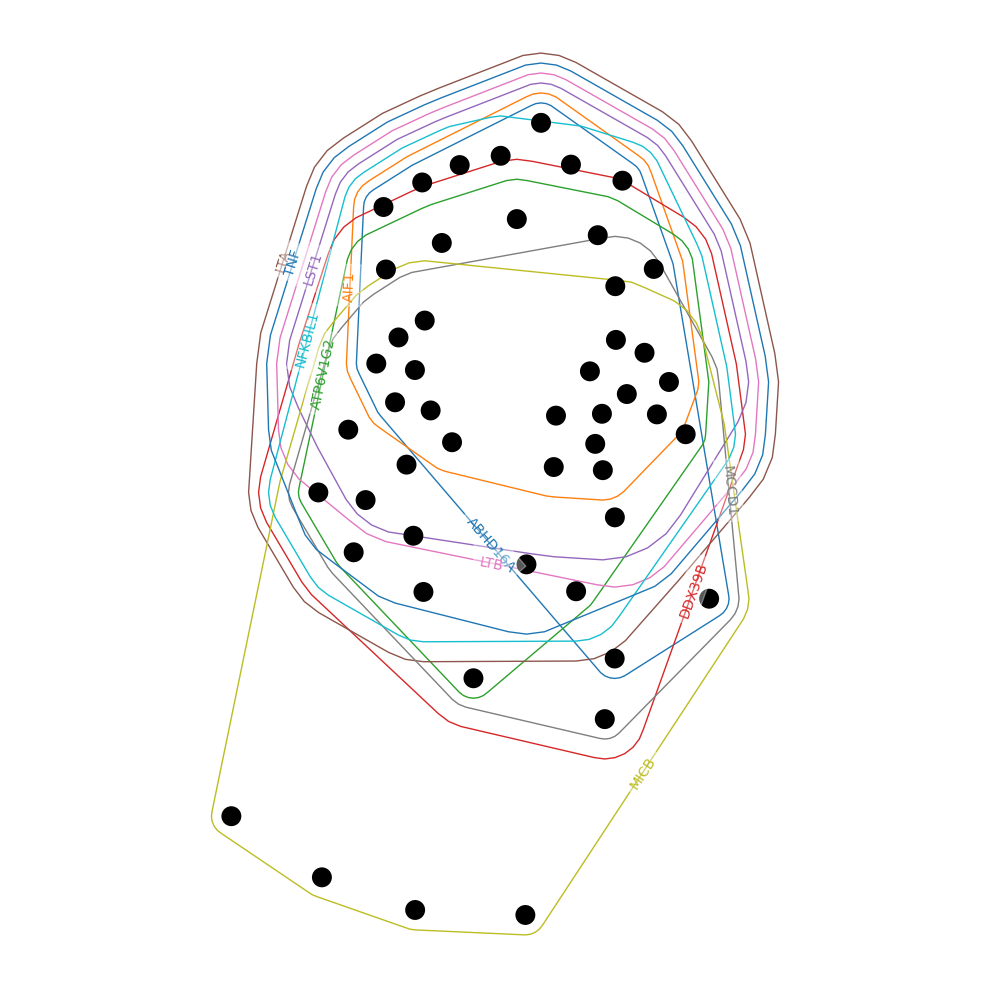

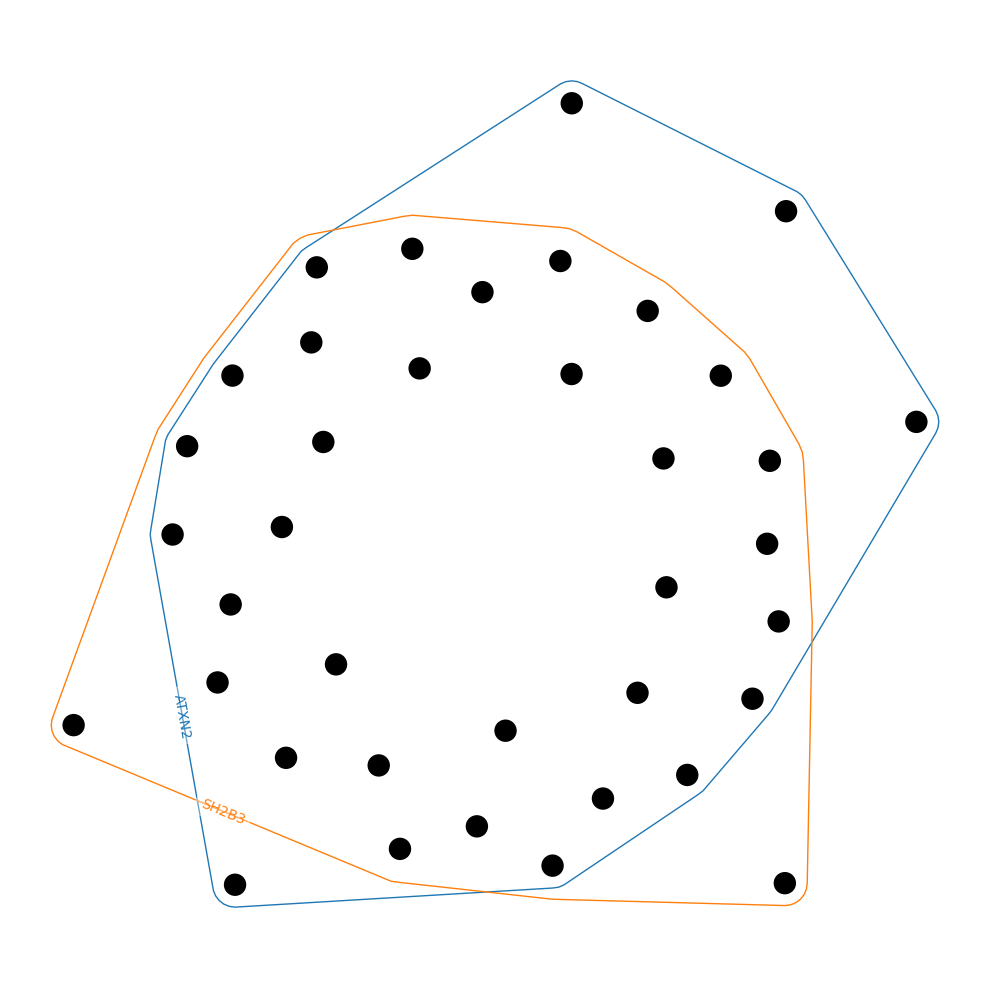

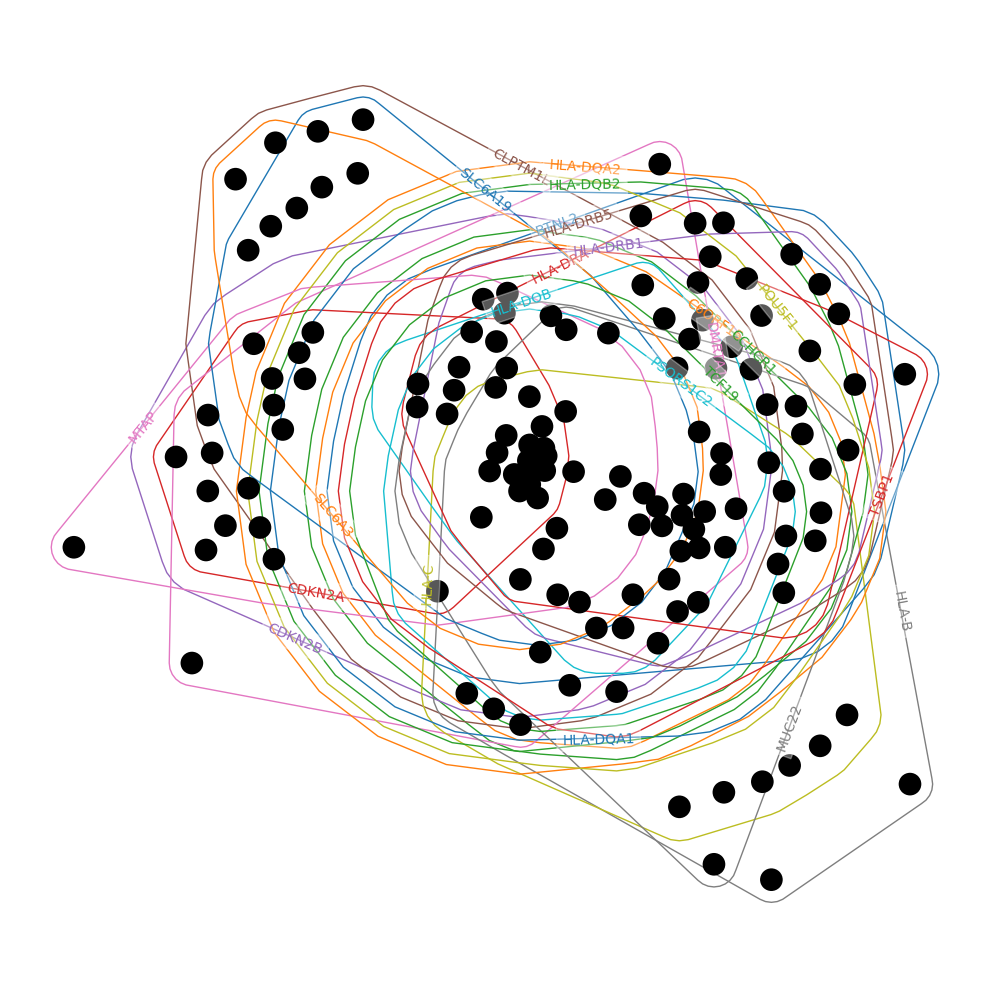

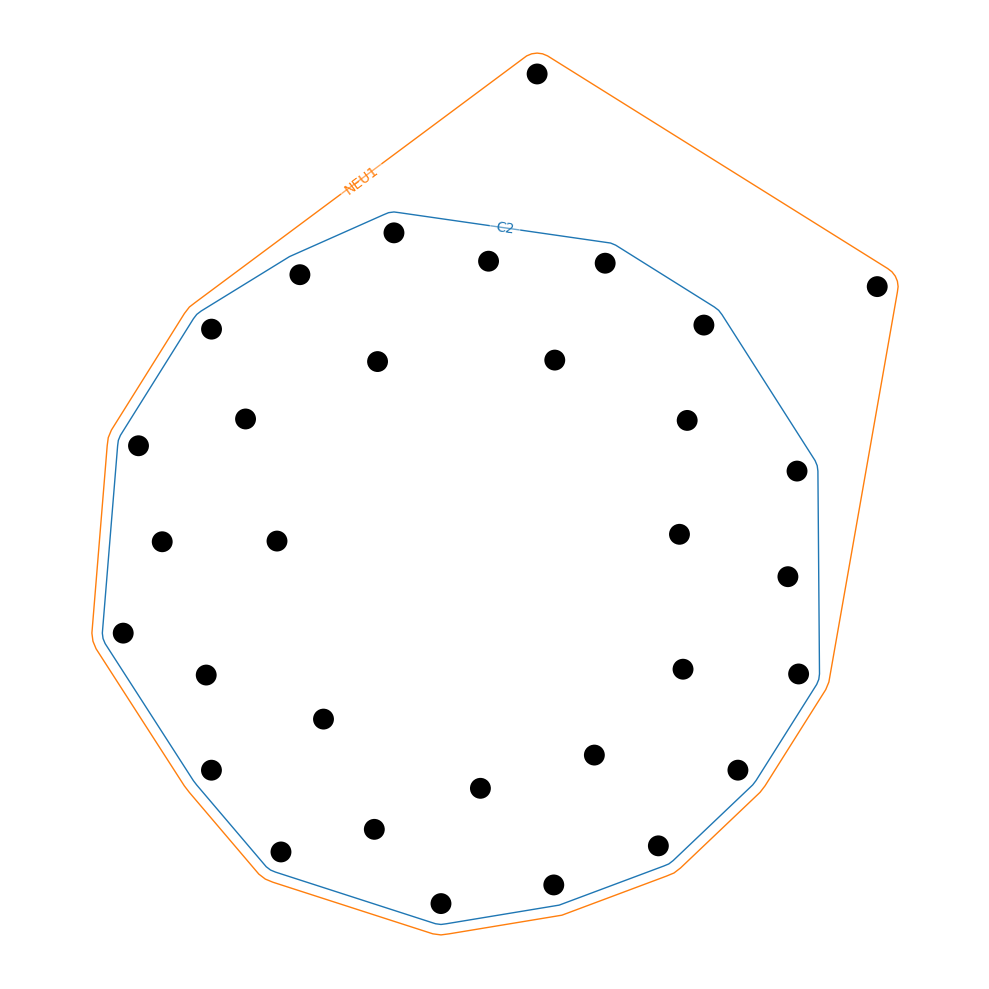

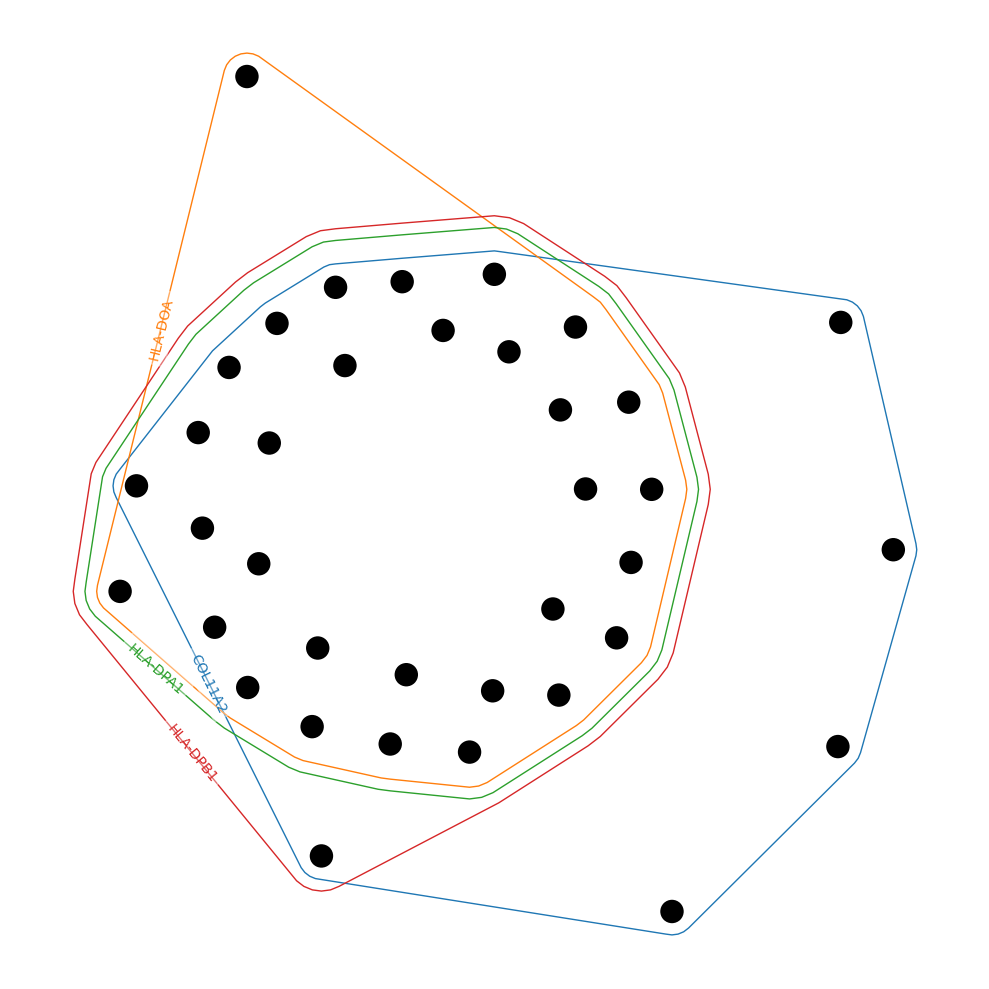

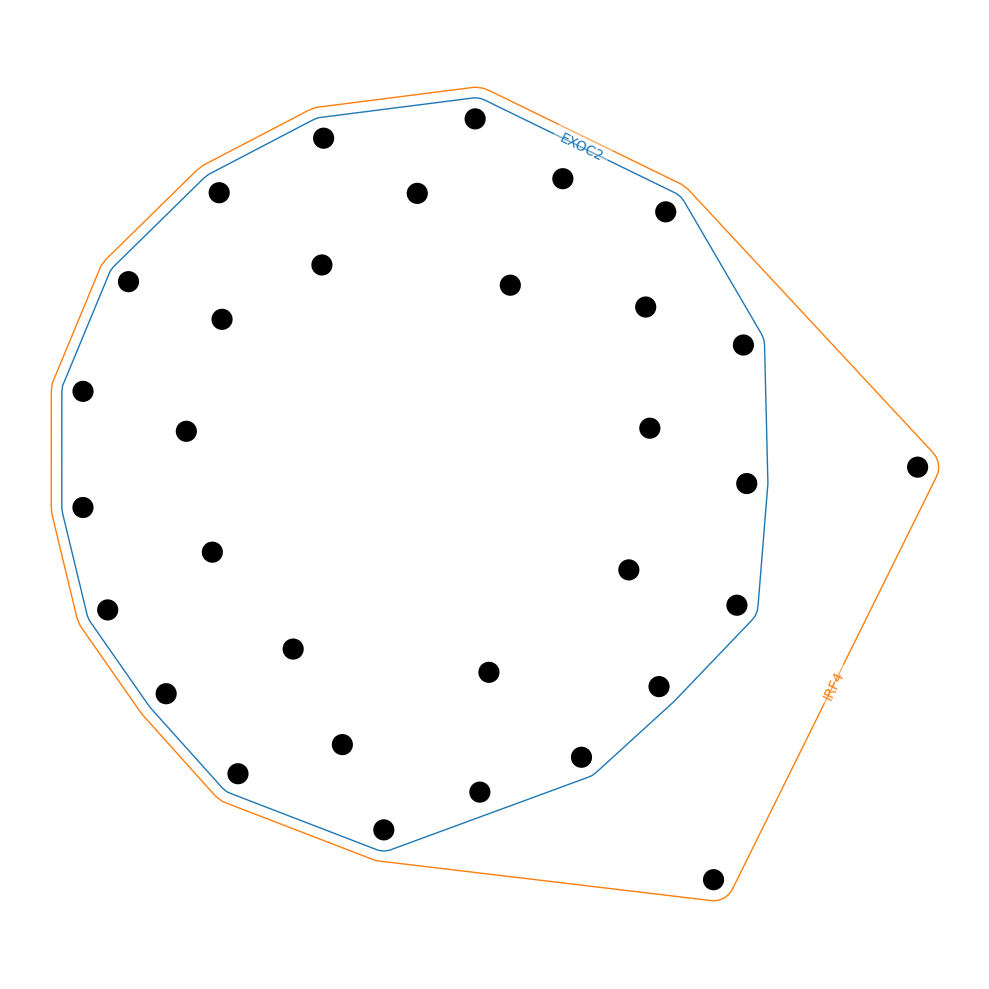

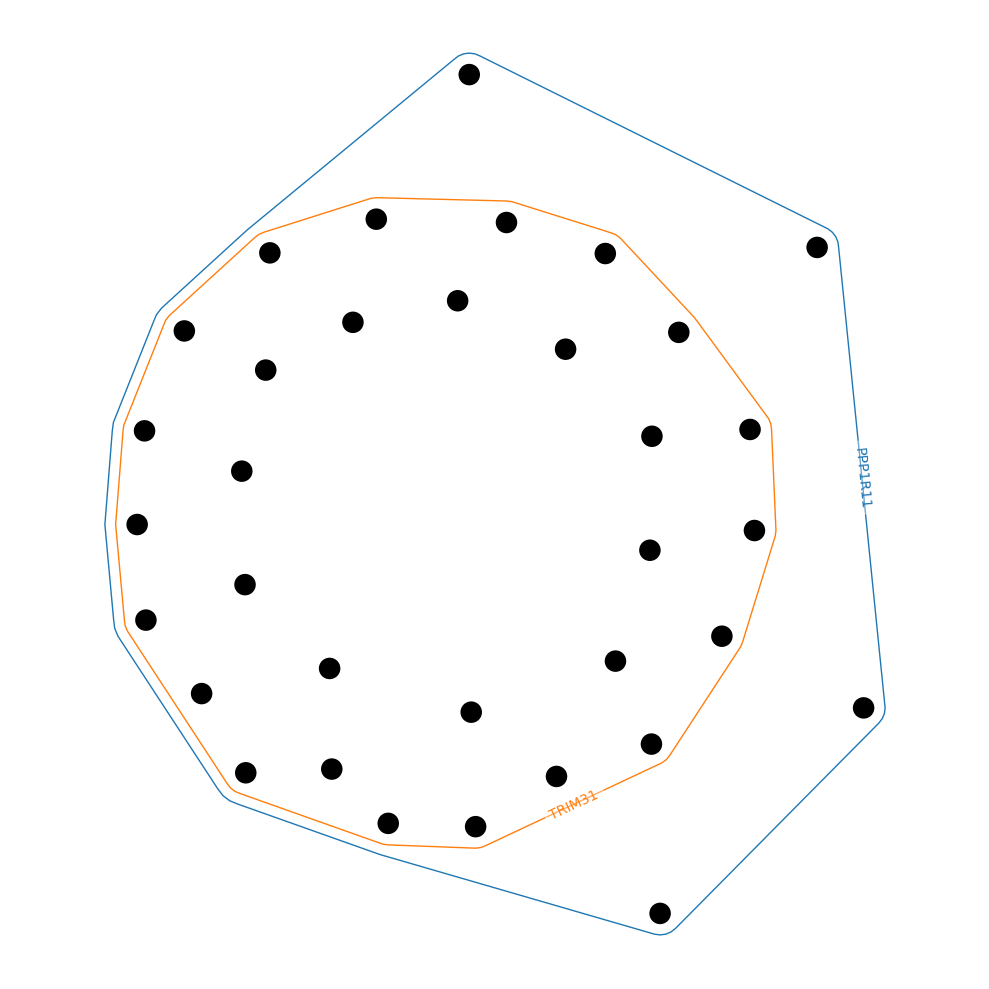

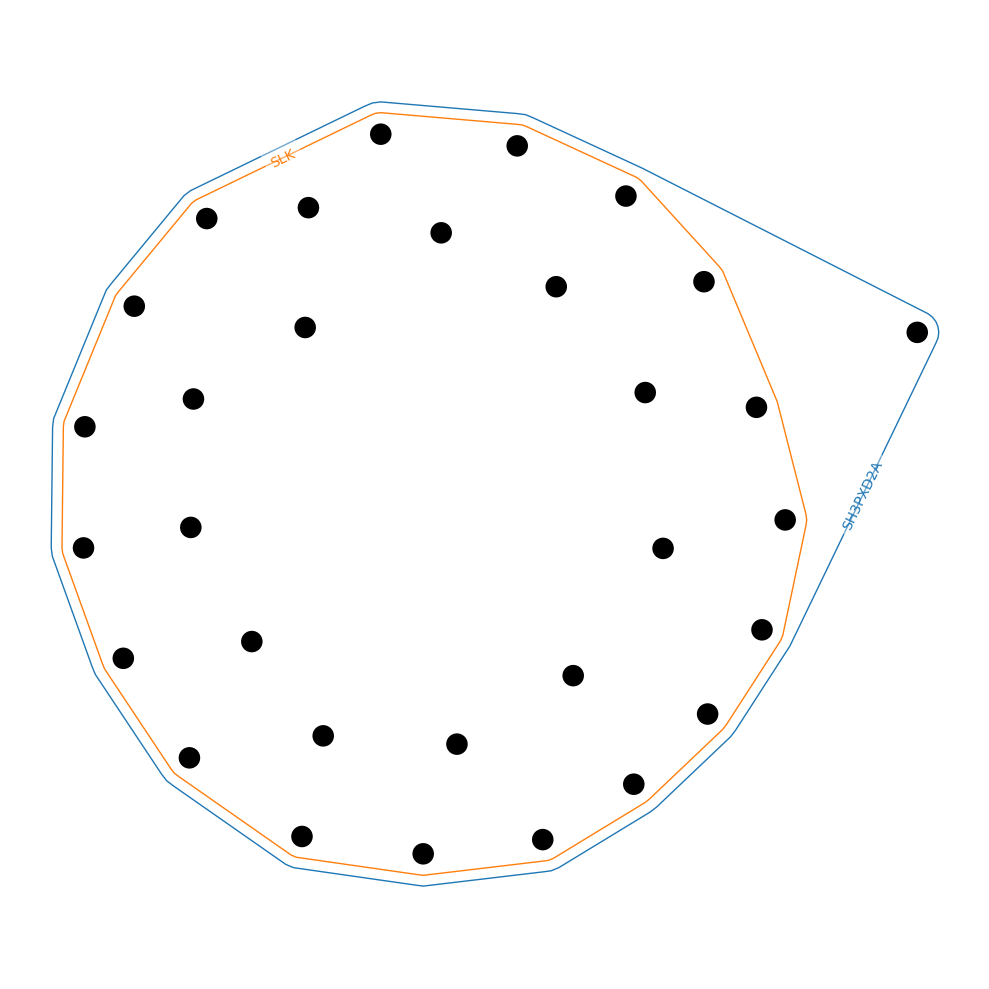

In [11]:
components = list(H.s_component_subgraphs(s=30))

for idx, sh in enumerate(components):
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Disegna il componente
    hnx.draw(
        sh,
        ax=ax,
        with_node_labels=False  # assicurati che siano visibili
    )
    
    #ax.set_title(f"Component {idx + 1}")
    plt.tight_layout()
    plt.show()